In [1]:
import sys, os

path = "P:/Dokumente/3 Uni/SoSe21/Data_Compression/DataCompressionNew/DataCompression/exp/test_2507/normal/1e-06"

sys.path.append("P:/Dokumente/3 Uni/SoSe21/Data_Compression/DataCompressionNew")
sys.path.append(os.getcwd())
from DataCompression.src.training_loop_adaptive import Trainer
from DataCompression.src.metric import evaluate
t = Trainer()
t.load(path)

Using cpu device
Creating environment from the given name 'BreakoutNoFrameskip-v4'
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Wrapping the env in a VecTransposeImage.
ADAPTIVE ALPHA GITHUB
Using custom NatureCNN feature extractor with added variance estimation
Created a buffer for images of shape torch.Size([1000, 100800]) and latents torch.Size([1000, 128])
ADAPTIVE ALPHA GITHUB
Using custom NatureCNN feature extractor with added variance estimation


In [2]:
import time
import torch
from tqdm import tqdm
def fill_buffer(samples=100, randomly=True, use_tqdm=True):
    """Fills the buffer randomly

    Args:
        steps (int): Number of steps to take
        use_tqdm (bool): Add progress bar if True.
    """
    print(f"Filling buffer with {samples} samples")
    time.sleep(1) # to avoid printstream clashing with progressbar
    observation = t._env.reset()
    r = tqdm(range(samples)) if use_tqdm else range(samples)
    get_action = t.random_env_action if randomly else t._rl_agent.predict

    env_step = 0
    for i in r:
        found_sample = False
        while not found_sample:
            print(observation.shape)
            action = get_action(observation)
            observation, reward, done, info = t._env.step(action)
            observation = torch.from_numpy(observation).float()
            latent = t._encoder_network(observation)[0].detach() # make sure to detach the latents to not propagate back through rl agent in decoder training
            env_step += 1

            if env_step > 100:
                t._buffer.add(observation, latent)
            if done:
                observation = t._env.reset()
                env_step = 0
                break

    t._env.close()

In [3]:
fill_buffer(10)

Filling buffer with 10 samples


  0%|          | 0/10 [00:00<?, ?it/s]

(1, 3, 210, 160)
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160

 10%|█         | 1/10 [00:03<00:35,  3.90s/it]

torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
(1, 3, 210, 160)
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160

 20%|██        | 2/10 [00:07<00:27,  3.46s/it]

(1, 3, 210, 160)
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160

 20%|██        | 2/10 [00:08<00:35,  4.41s/it]

torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])
torch.Size([1, 3, 210, 160])


KeyboardInterrupt: 

In [4]:
from matplotlib import pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

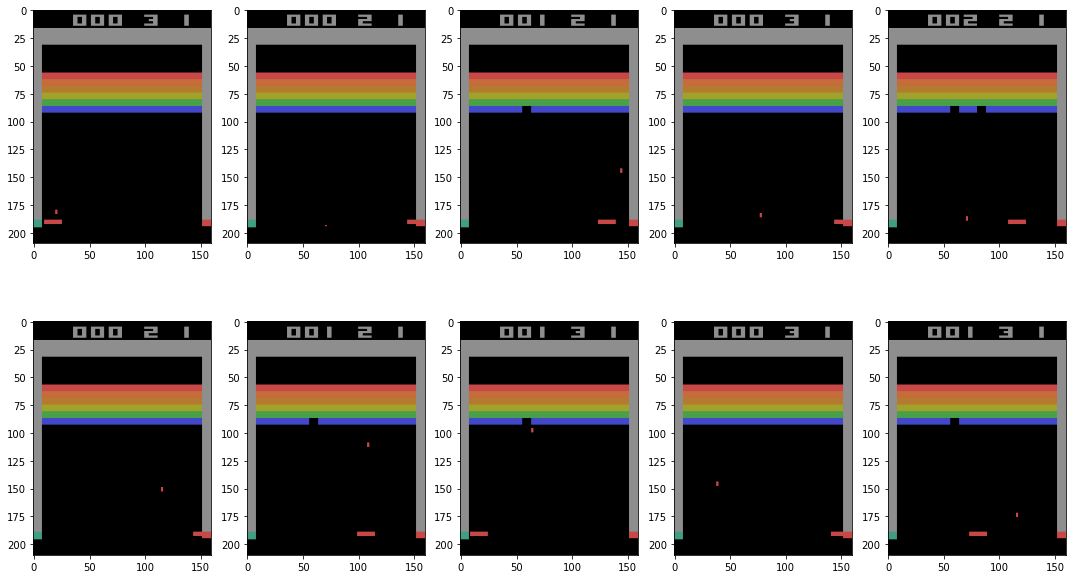

In [18]:
fig, axs = plt.subplots(2, 5)
fig.set_size_inches(18.5, 10.5)
for ax in fig.axes:        
    image = t._buffer.sample(1)[0][0]
    image = image.reshape(3, 210, 160)
    image = image.permute(1, 2, 0)
    image = image.type(torch.int64)
    ax.imshow(image)